In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Box-Muller et Sphère


## Box Muller


### Principe

Nous allons maintenant introduire la technique de Box-Muller permettant de simuler des v.a gaussiennes (pourquoi n'utilise-t-on pas l'une des techniques précédentes?). Nous procédons par "analyse" et "synthèse".

***Notations:*** Si $(x,y)$ est un point de $\mathbb R^2$, on note $r(x,y) = \sqrt{x^2+y^2}$ et $\theta(x,y)$ ses coordonnées polaires.

***Analyse:*** On considère $(X,Y)$ un couple de gaussiennes indépendantes. Calculons la loi de $R=r(X,Y)$ et $\Theta=\theta(X,Y)$: considérons $\phi$ une fonction test, on a:
$$
    \mathbb E[ \phi( R ,\Theta)  ]   =  cst   \int \int     \phi\big( r(x,y),\theta(x,y)\big)  e^{-\frac 12 (x^2+y^2 ) }\, dx dy
$$



On fait le changement en coordonnées polaires:
$(r(x,y),\theta(x,y))  \to (r,\theta)$, donc $(dx\,dy)\to \color{red}{\square \square \square}$


(à connaître par coeur sous peine de devoir calculer un Jacobien). Les domaines d'intégration se transforment ainsi:
$\mathbb  R \times  \mathbb  R  \to  \mathbb  R_+ \times [0,2 \pi]$.
Ainsi:
\begin{align*}
\mathbf{E}[\phi(R,\Theta)]
&= \frac{1}{2\pi} \iint \phi (r(x,y), \theta(x,y))e^{-\frac{1}{2}(x^2 + y^2)}\,dx\,dy \\
&= \frac{1}{2\pi} \int_{\theta=0}^{2\pi} \int_{r=0}^{+\infty} \phi(r,\theta) e^{-\frac{r^2}{2}}\,\color{red}{\square \square \square}
\end{align*}
$$
= \int \int \phi(r,\theta)\Big(\color{red}{\square \square \square}\Big) \Big(\color{red}{\square \square \square}\Big)
$$


* On voit que $R$ et $\Theta$ sont indépendantes car <font color="red"> □ □ □ </font>.

* $\Theta$ suit une loi <font color="red"> □ □ □ </font> sur $[0,2\pi]$

* Avec un peu d'expérience, on voit que $R$ suit une loi de <font color="red"> □ □ □ </font> de paramètres de forme $\alpha=2$ et de paramètre d'échelle $\sqrt{2}$ ce qui éuivaut à dire que $R^2$ suit une loi exponentielle de paramètre d'échelle $2$ (cf TP sur l'inversion de la fonction de répartition).







***Synthèse:*** Pour simuler un couple de v.a gaussiennes indépendantes, on simule $R \sim \text{Weibull}(scale=\sqrt{2},\alpha=2)$ et  $\Theta \sim \text{Unif}[0,2 \pi]$, et on considére le point de coordonnées polaires  $(R, \Theta)$.

En pratique, on prend $U$ et $V$ deux v.a de loi $\text{Unif}[0,1]$ et on considère  $R=\sqrt{ 2 |\ln(U)| }$ puis
$X=\sqrt{ 2 |\ln(U)| } \cos(2 \pi V )$ et $Y=\sqrt{ 2 |\ln(U)| } \sin(2 \pi V )$.




### Simulation ▹



***A vous:*** mettez en place une fonction qui fournisse $n$ v.a gaussiennes d'un coup.  Essayez de ne pas gaspiller les appels du générateur aléatoire, en utilisant la version sinus et la version cosinus. Validez en superposant l'histogramme de vos simulations avec la densité de la gaussienne.

#### ♡♡♡



In [ ]:
#utilisons Box-Muller pour simuler des Gaussiennes
def simul_normal(n):

n = 100000
X = simul_normal(n)
plt.hist(X,bins = 20, density = True, edgecolor='k')

x = np.linspace(X.min(), X.max(), 100)
plt.plot(x, 1/(np.sqrt(2*np.pi))*np.exp(-x**2/2));

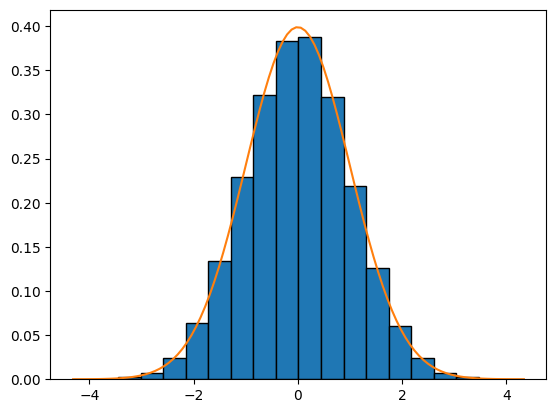

In [ ]:
#--- To keep following outputs, do not run this cell! ---

### Parenthèse : les coordonnées polaires en informatique

Notons qu'en `numpy` l'angle d'un point `(x,y)` se calcule avec la fonction `np.arctan2(y,x)` et que dans tous les autres langages le mot clef `arctan2` apparait; mais quel est le lien avec la fonction arctangente?

#### ♡


L'angle orienté dans $]-\pi;\pi]$ d'un point $(x,y) \neq (0,0)$ est donné par :
$$
\left\{
\begin{array}{lcl}
\color{red}{\square \square \square} & & \text{si } x>0, y\geqslant0 \\
\frac{\pi}{2} & & \text{si } x=0, y>0\\
\pi + \color{red}{\square \square \square} & & \text{si } x<0, y\geqslant0\\
\color{red}{\square \square \square} - \pi & & \text{si } x<0, y<0\\
-\frac{\pi}{2} & & \text{si } x=0, y<0\\
\color{red}{\square \square \square} & & \text{si } x>0, y\leqslant0 \\
\end{array}
\right.
$$

## Intuitez une technique pour simuler des points sur une sphère


Avant de lire la suite:

Comment feriez-vous pour simuler des points uniformément répartis sur une sphère ?

### Technique naive fausse

À noter que la méthode « naïve » consistant à normaliser une variable aléatoire de loi uniforme sur $[-1;1]^d$ ne fonctionne pas, le résultat n'est pas uniforme. Par exemple, en dimension 2, les zones Nord, Ouest, Sud, Est sont moins chargées que les zones NE, NO, SO, SE :

In [ ]:
n = 10000

X = np.random.uniform(-1,+1,n)
Y = np.random.uniform(-1,+1,n)
N = np.sqrt(X**2 + Y**2)

plt.plot(X/N, Y/N, "o", alpha=0.01);

### Technique naive OK

Et si on commencer par simuler une loi uniforme sur la boule (par rejet) et que l'on normaliser ensuite...

MAIS:

Volume de la sphère
$$
{\pi^{n\over 2} R^n\over \Gamma(n/2+1)}
$$

Volume du cube: $2^n$

In [ ]:
import scipy
def ratio_sphere_cube(n):
    return np.pi**(n/2) / scipy.special.gamma(n/2+1) / 2**n

n=np.arange(1,16,1)
ratio=ratio_sphere_cube(n)
fig,ax=plt.subplots()
ax.plot(ratio);
ax.set_yscale("log")

CONCLUSION: ...

## La bonne technique

### Invariant par rotation


Le but de cette partie est de comprendre comment l'on peut simuler de manière efficace des points répartis uniformément sur la sphère, en toute dimension.




*Vocabulaire:* Notons $\|x\|$ la norme de $x$.  Une fonction $f(x)$ est invariante par rotation lorsqu'elle s'écrit $f(x)=g(\|x\|)$ pour une certaine fonction $g$.

Considérons:

* une densité $f(x)$ sur $\mathbb R^d$ invariante par rotation.
* une v.a $X$ de loi $f(x)\,dx$.
* une rotation $T$ de $\mathbb R^d$, de centre 0.




#### ♡♡♡

Vérfions que $T(X)$ a aussi pour loi $f(x)dx$. En effet, si $\phi$ est une fonction test, comme les rotations sont inversibles et que leur º(déterminantº) vaut 1, le changement de variable $T(x) \to y  $ donne :
\begin{align*}
   \mathbf E[\phi(T(X))] &= \int_{\mathbb R^n} \phi(T(x)) f(x) dx \\
   &= \int_{\mathbb R^n}\( \phi(y) f(T^{-1}(y))\) dy \\
   &= \int_{\mathbb R^n} \phi(y)f(y)  = \mathbf  E[\phi(X)]
\end{align*}

#### ♡♡


Cherchons maintenant une densité $f(x)=f(x_0,...,x_{d-1})$  qui est invariante par rotation, et qui en plus est la loi de $d$ variables indépendantes.
Soit $f$ une telle densité.
Comme $f$ est la loi de $d$ variables indépendantes, il existe $f_0, ..., f_{d-1}$ telles que
$$f(x_0, ..., x_{d-1}) =\color{red}{\square \square \square}
$$
De plus, comme $f$ est invariante par rotation, il existe une fonction $g$ telle que $f(x) = g(\|x\|)$ ou encore, de manière équivalente, telle que
$$f(x_0, ..., x_{d-1}) = g(x_0^2 + \cdots + x_{d-1}^2).$$
On a donc
$$f_0(x_0) \cdots f_{d-1}(x_{d-1}) = g(x_0^2 + \cdots + x_{d-1}^2)$$
Remarquons que pour tout $i$, $f_i(0) \neq 0$. En effet, s'il en était autrement, $f$ s'annulerait sur l'hyperplan $\{x_i = 0\}$. Comme $f$ est invariante par rotation, elle serait donc identiquement nulle, ce qui est incompatible avec le fait qu'il s'agisse d'une densité. Quitte à diviser chaque $f_i$ par $f_i(0)$, on peut donc supposer que $f_i(0) = 1$. En choisissant tous les $x_i$ nuls sauf un, on voit qu'il en découle que pour tout $i$, $f_i(x_i) = g(x_i^2)$. En posant $X_i = x_i^2$, on a donc :
$$g(X_0)...g(X_{d-1}) = g(X_0 + ... + X_{d-1}) \quad\text{et}\quad g(0) = 1$$
Les seules solutions (non constantes) de cette équation sont les fonctions $x\mapsto\color{red}{\square \square \square}(cx)$, et pour que $g$ soit intégrable, il faut $c < 0$.
On peut donc conclure que $f$ peut s'écrire sous la forme suivante, où $\lambda$ désigne un réel positif :
$$
f(x_0, ..., x_{d-1}) = cst\ e^{-\lambda(x_0^2 + ... + x_{d-1}^2 ) }
$$
On reconnaît la densité d'un $d$-uplet de lois normales centrées réduites, que l'on peut donc simuler avec la méthode vue précédemment.



### Implémentation


En normalisant le résultat, on obtient alors une simulation de la loi uniforme sur $S^{d-1}$. Implémentons une fonction qui fait cela:

In [ ]:
def simul_unif_sphere(n,d):
    X = np.random.normal(size=(n,d))
    return X / (np.linalg.norm(X, axis=1)[:,None])

On peut visualiser les simulations en dimension 2 ou en dimension 3:

In [ ]:
n = 1000
d = 2

X = simul_unif_sphere(n,d)
plt.plot(X[:,0],X[:,1], 'o', alpha = 0.1);

In [ ]:
n = 1000
d = 3

X = simul_unif_sphere(n,d)

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(1,1,1, projection='3d')
ax.plot(X[:,0], X[:,1], X[:,2], '.');

### Calcul d'intégrale sur la sphère

Cette méthode pour simuler uniformément des points sur une shère en dimension quelconque nous permet d'approximer des intégrales sur des shères. En effet, si $h$ est une fonction de $S^{d-1}$ dans $\mathbb{R}$ et si $(X_k)_k$ est une famille de v.a i.i.d de loi uniforme sur $S^{d-1}$, alors d'après la loi forte des grands nombres:
$$
\lim_{n\to\infty}\frac{1}{n} \sum_{k=1}^n h(X_k)
= \mathbf E[h(X_1)].
$$
Or
$$
\mathbf E[h(X_1)]
= \frac{1}{\text{surface}(S^{d-1})} \int_{S^{d-1}} h(x)\, dx,
$$
donc en effectuant $N$ simulations $x_1, ..., x_N$ indépendantes de la loi uniforme sur $S^{d-1}$, on a:
$$
\int_{S^{d-1}} h(x)\, dx \simeq \frac{\text{surface}(S^{d-1})}{N} \sum_{k=1}^N h(x_k)
$$





J'imagine que, sans les probabilités, vous sauriez estimer ce type d'intégrale pour d=1 et d=2 (à l'aide des angles d'Euler), mais au-delà c'est difficile. Les méthodes de Monte Carlo sont faites pour cela: pour calculer des intégrales sur des domaines non-rectangulaires, non plans (des surfaces), non plans et avec des trous (cf exo ci-dessous) ou en grande dimension.

### Application à la peinture

***A vous:***  Calculez la quantité de peinture qu'il faudrait pour peindre la sphère $S^2$ privée de ses pôles nord et sud, c.à.d des points $(x,y,z)$ tels que $x^2+y^2 < 0.1$.




#### ♡♡

In [ ]:
n = 1000
X = simul_unif_sphere(n, 3)


mask =

X_in = X[mask]
X_out = X[~mask]

fig=plt.figure()
ax=fig.add_subplot(1,1,1, projection='3d')
ax.plot(X_in[:,0], X_in[:,1], X_in[:,2], 'g.')
ax.plot(X_out[:,0], X_out[:,1], X_out[:,2], 'r.');

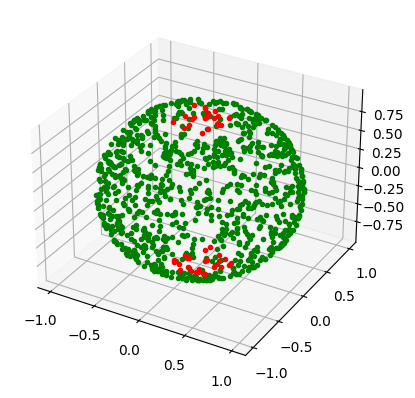

In [ ]:
#--- To keep following outputs, do not run this cell! ---

#### ♡♡

Puis modifiez cotre programme pour calculer la quantité de peinture quand on enlève les 6 calotes intersectants les axes x,y,z.

In [ ]:
n = 1000
X = simul_unif_sphere(n, 3)


index_in =

X_in = X[index_in]
X_out = X[~index_in]

fig=plt.figure()
ax=fig.add_subplot(1,1,1, projection='3d')
ax.plot(X_in[:,0], X_in[:,1], X_in[:,2], 'g.')
ax.plot(X_out[:,0], X_out[:,1], X_out[:,2], 'r.');

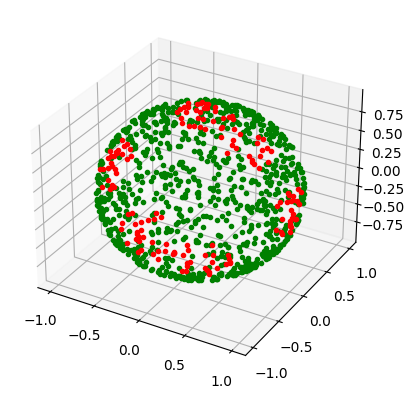

In [ ]:
#--- To keep following outputs, do not run this cell! ---

### D'un point de la Terre à un point de la Lune


Comment peut-on estimer la distance moyenne entre la surface de la terre et la surface de la lune? En d'autres termes: quelle est  l'espérance de la distance entre un point aléatoire sur la terre et un point aléatoire sur la lune (en ligne droite) .

Décrivez $(2\heartsuit)$ l'agorithme, et programmez-le $(3\heartsuit)$.  Constantes utiles:

* distance terre lune: $384\,400$ km
* diamètre de la terre: $12 \,742$ km
* diamètre de la lune $3\,474$ km


#### ♡♡♡

On modélise la Terre par la sphère T de centre $(0,0,0)$ et de rayon $r_T$, et la Lune par la sphère de centre $(d_{TL},0,0)$ et de rayon $r_L$. Pour estimer l'espérance demandée, on simule des tirages aléatoires uniformes sur S et T par la méthode précédente, et on fait la moyenne des distances entre les points obtenus.

In [ ]:
n = 10000

d_tl = 384400
r_t = 12742/2
r_l = 3474/2

L = np.array([d_tl,0,0]) + r_l*simul_unif_sphere(n,3)
T = r_t*simul_unif_sphere(n,3)
...


In [ ]:
#--- To keep following outputs, do not run this cell! ---

Distance moyenne : 384413.0924823727


La distance entre la Terre et la Lune est très grande devant leurs rayons respectifs, si bien qu'on a l'impression que la distance moyenne entre deux points sur des sphères est égale à la distance entre les centres des sphères.



Ce n'est pourtant pas le cas, comme l'illustre l'exemple ci-dessous:

In [ ]:
n = 1000

d_tls = np.arange(0,100,10)
r_t = 30
r_l = 30

L = r_l*simul_unif_sphere(n,3)
T = r_t*simul_unif_sphere(n,3)

distances_mean=[]

for d_tl in d_tls:
    ...

fig,ax=plt.subplots()
ax.plot(d_tls,label="dist entre centre")
ax.plot(distances_mean,label="dist moyenne")
ax.legend();

### Ne pas confondre

Parfois on dit des idioties comme "la distance entre deux objet c'est la distance entre leur barycentre".


Cette phrase n'est vraie que pour la distance "signée". Et cela signifie tout bêtement que
$$
\int_{Obj_1}\int_{Obj_2} (x_1-x_2) dx_1dx_2 = \int_{Obj_1}x_1dx_1 - \int_{Obj_2}x_2dx_2
$$